<a href="https://colab.research.google.com/github/GrE3lzzz/Gittea/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Mount Google Drive (optional, if you want to save files there)
from google.colab import drive
drive.mount('/content/drive')

# Upload multiple files
uploaded = files.upload()

# Initialize an empty dictionary to store datasets
datasets = {}

# Process each uploaded file
for filename, content in uploaded.items():
    print(f"Processing file: {filename}")

    # Read the file as a DataFrame (assuming all files are CSVs)
    try:
        dataset = pd.read_csv(filename)
        datasets[filename] = dataset  # Store the DataFrame in the dictionary
        print(f"Successfully loaded {filename} into a DataFrame.\n")
    except Exception as e:
        print(f"Error loading {filename}: {e}\n")

Mounted at /content/drive


KeyboardInterrupt: 

In [ ]:
# Combine datasets into a unified dataset
unified_data = pd.concat(datasets.values(), axis=0, ignore_index=True)

# Save unified dataset
unified_data.to_csv("unified_traffic_data.csv", index=False)
print("Unified dataset created and saved as 'unified_traffic_data.csv'.")

# Data Preprocessing
print("Starting data preprocessing...")

# Handle missing values
unified_data.fillna(method="ffill", inplace=True)

Unified dataset created and saved as 'unified_traffic_data.csv'.
Starting data preprocessing...


<ipython-input-5-021159e6d81e>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  unified_data.fillna(method="ffill", inplace=True)


<ipython-input-3-6584a846f2c1>:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  aggregated_data = unified_data.groupby([pd.Grouper(key='time', freq='15T')])[


Preprocessed dataset created and saved as 'preprocessed_traffic_data.csv'.
Dataset with simulated propagation delays saved as 'delayed_traffic_data.csv'.


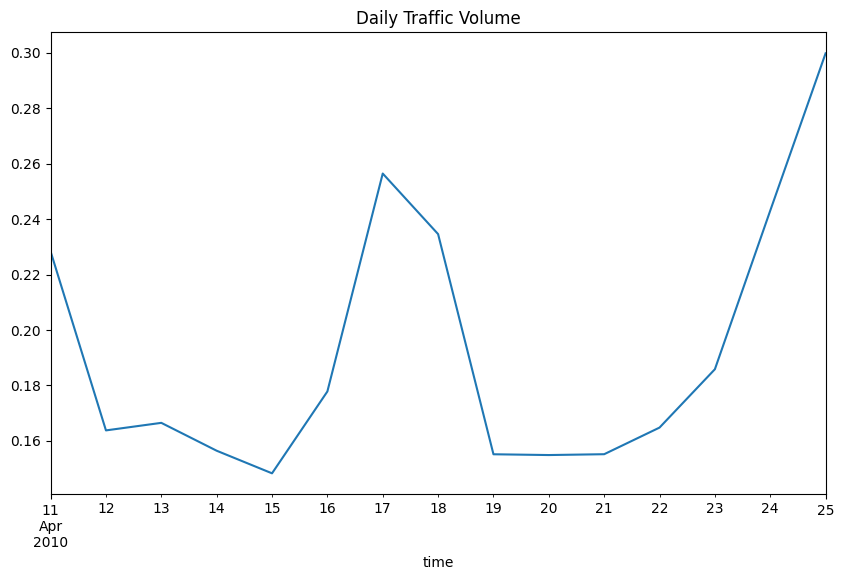

In [ ]:
# Feature engineering
# Check if 'time' column exists before processing it
if 'pickup_datetime' in unified_data.columns:  # Check for 'pickup_datetime' column
    unified_data['time'] = pd.to_datetime(unified_data['pickup_datetime'])  # Rename to 'time'
    unified_data['hour'] = unified_data['time'].dt.hour
    unified_data['day_of_week'] = unified_data['time'].dt.dayofweek
else:
    print("Warning: 'pickup_datetime' column not found in the dataset. Feature engineering steps related to 'time' will be skipped.")

# Check if 'location_id' column exists before grouping
if 'DOLocationID' in unified_data.columns:  # Check for 'DOLocationID' column
    # Aggregate data into 15-minute intervals
    aggregated_data = unified_data.groupby(['DOLocationID', pd.Grouper(key='time', freq='15T')])[  # Use 'DOLocationID'
        'passenger_count'  # Use 'passenger_count' for aggregation
    ].mean().reset_index()
else:
    print("Warning: 'DOLocationID' column not found in the dataset. Aggregation will be performed on 'time' only.")
    # Aggregate data into 15-minute intervals based on 'time' only
    aggregated_data = unified_data.groupby([pd.Grouper(key='time', freq='15T')])[
        'passenger_count'  # Use 'passenger_count' for aggregation
    ].mean().reset_index()

# Rename 'passenger_count' to 'traffic_volume'
aggregated_data = aggregated_data.rename(columns={'passenger_count': 'traffic_volume'})

# Normalize traffic volume
scaler = MinMaxScaler()
aggregated_data['traffic_volume'] = scaler.fit_transform(aggregated_data[['traffic_volume']])

# Save preprocessed data
aggregated_data.to_csv("preprocessed_traffic_data.csv", index=False)
print("Preprocessed dataset created and saved as 'preprocessed_traffic_data.csv'.")

# Simulate propagation delays
delayed_data = aggregated_data.copy()
delayed_data['traffic_volume'] = delayed_data['traffic_volume'].shift(5)  # 5-time step delay
delayed_data.dropna(inplace=True)  # Drop rows with NaN caused by the shift
delayed_data.to_csv("delayed_traffic_data.csv", index=False)
print("Dataset with simulated propagation delays saved as 'delayed_traffic_data.csv'.")

# Visualize traffic volume over time
plt.figure(figsize=(10, 6))
aggregated_data.set_index('time')['traffic_volume'].resample('D').mean().plot(title="Daily Traffic Volume")
plt.show()